# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

In [1]:
library("tidyverse")
volcano = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  

Use the `print` function to find the number of rows and columns in the data.

In [2]:
volcano %>% print

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [21]:
eruption_number = volcano %>%
    group_by(volcano_name) %>%
    count() %>%
    arrange(desc(n)) %>%
    head(1)

eruption_number

volcano_name,n
<chr>,<int>
Etna,241


Volcano with most eruptions is Etna (with 241 eruptions)

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [22]:
most_recent = volcano %>%
    filter(volcano_name == "Etna") %>%
    arrange(desc(start_year)) %>%
    head(1)

most_recent

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211060,Etna,20841,Confirmed Eruption,New Southeast Crater (NSEC),2,2013,9,3,Historical Observations,2020,4,17,37.748,14.999


The most recent eruption for Etna was in 2013 (and ended 2020)

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

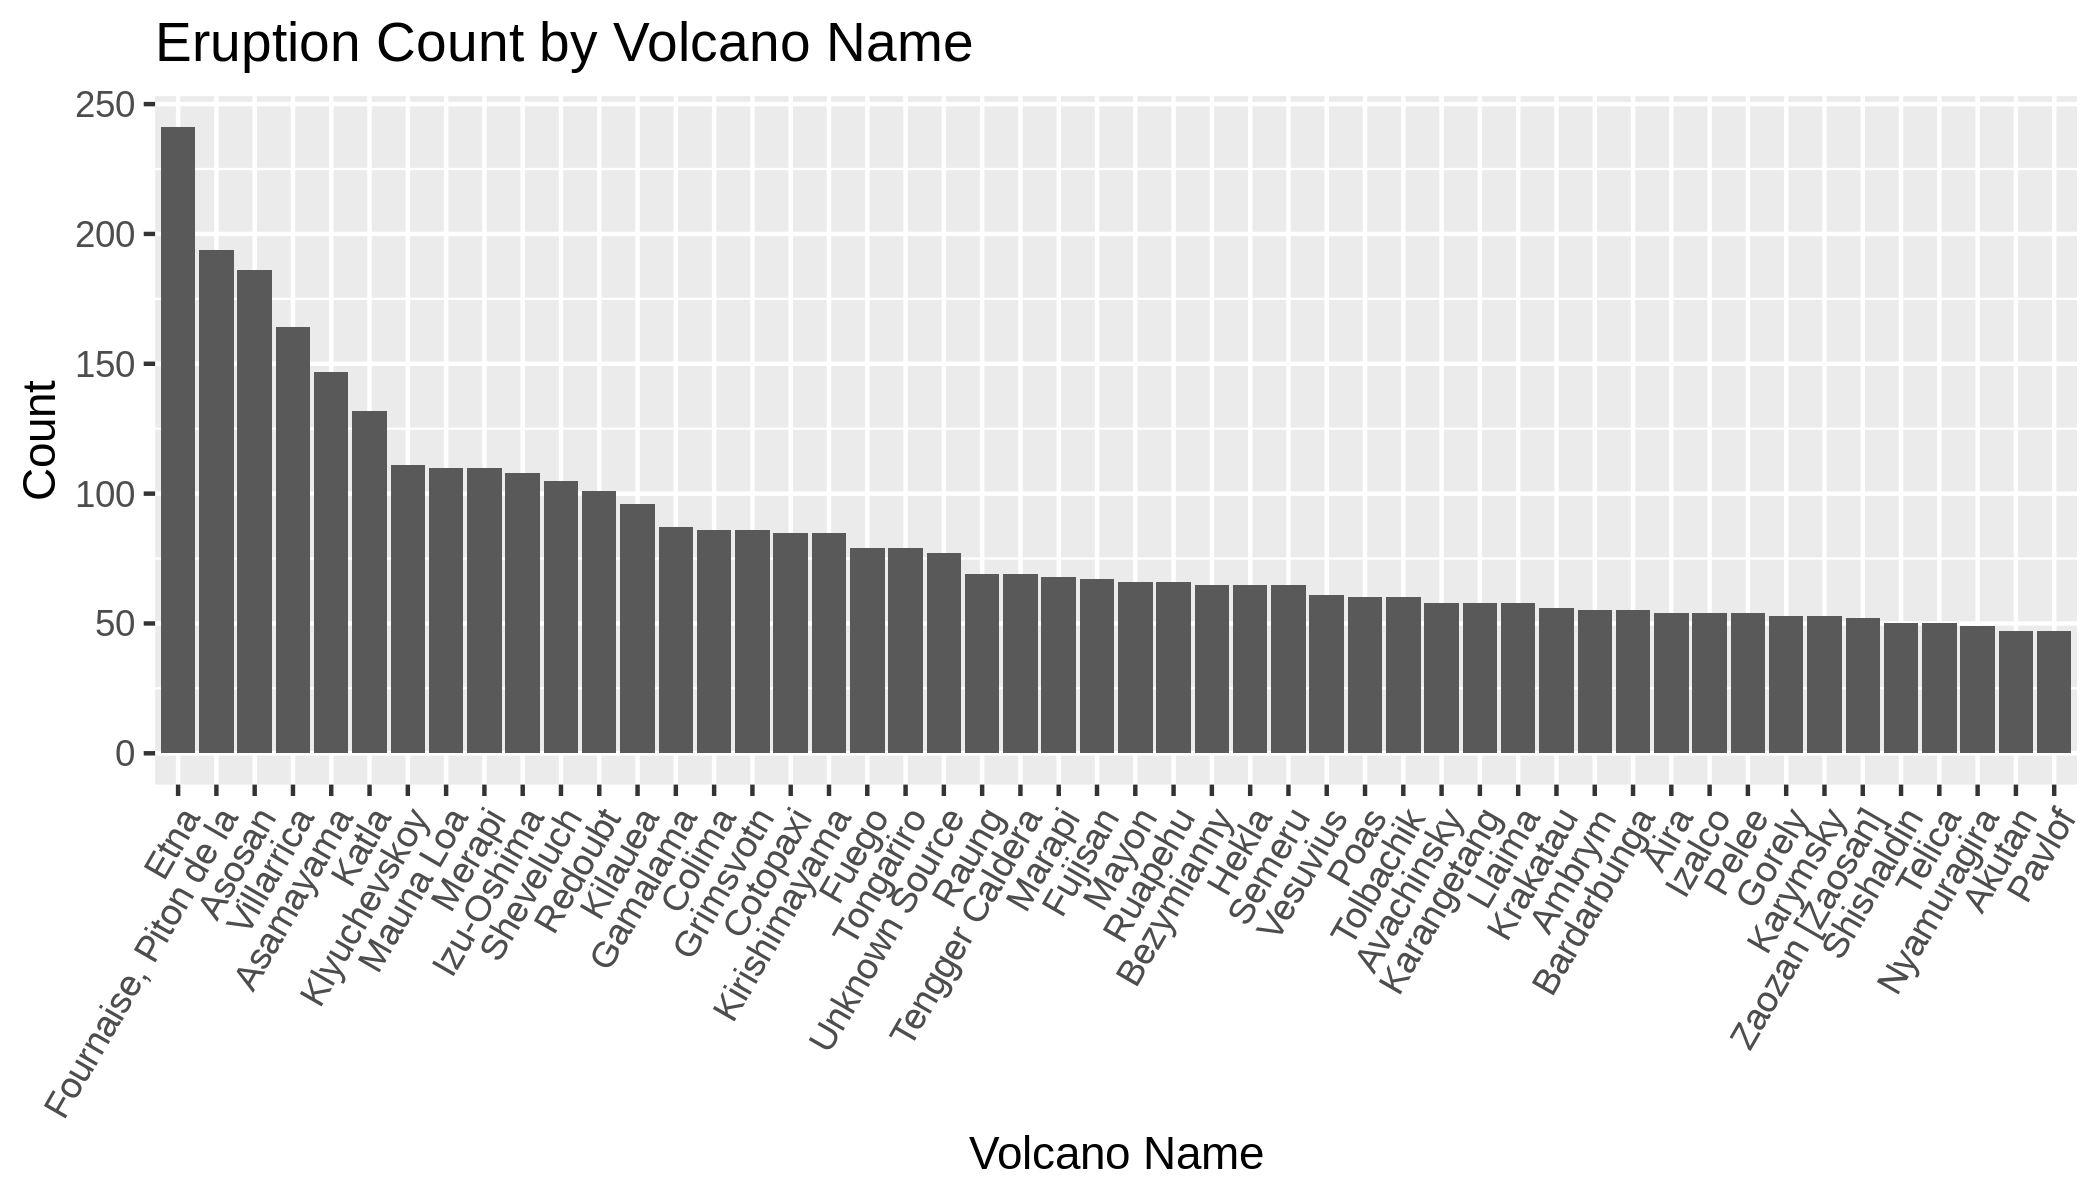

In [35]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

vol_graph = volcano %>%
    mutate(vol_graph = volcano_name %>% fct_lump(n=50) %>% fct_infreq()) %>%
    filter(vol_graph != "Other")

p = ggplot(vol_graph, aes(x = vol_graph))

p = p + geom_bar() 

p = p + xlab("Volcano Name") + ylab("Count")

p = p + ggtitle("Eruption Count by Volcano Name")

p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1))

p

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

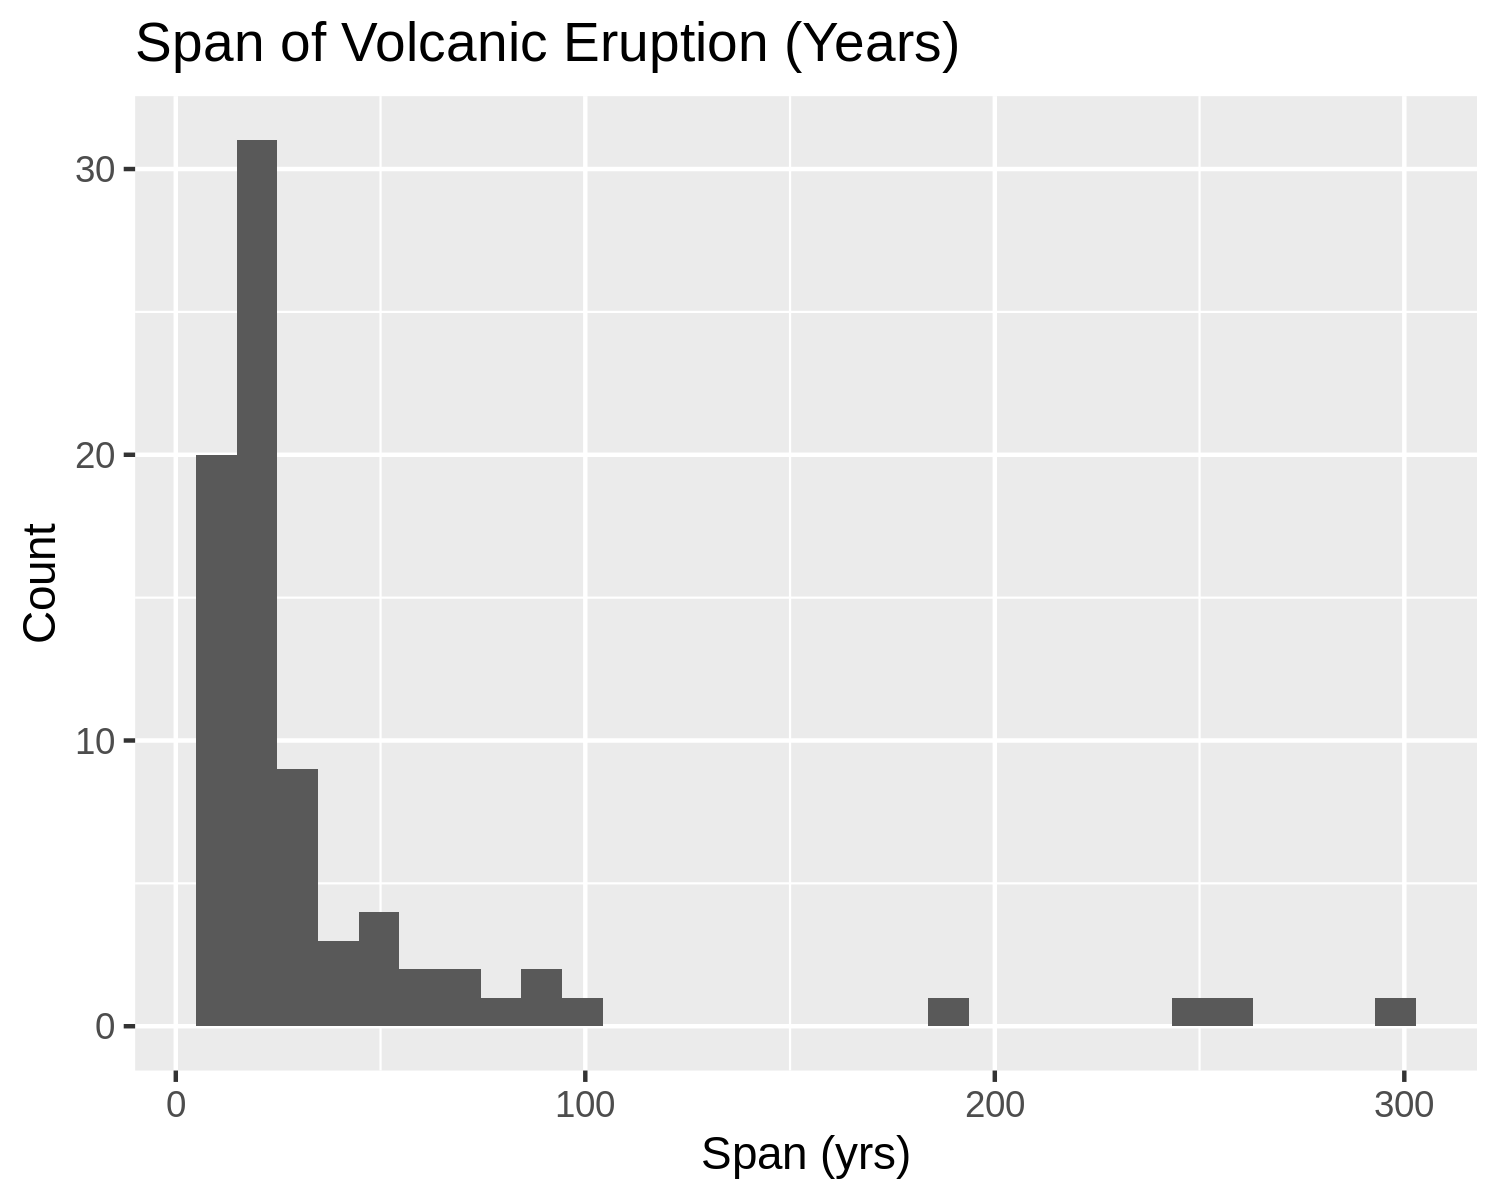

In [52]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)
eruption_span = volcano %>%
    mutate(eruption_span = end_year-start_year) %>%
    filter(eruption_span > 10)

p = ggplot(eruption_span, aes(x = eruption_span))

p = p + geom_histogram(bins=30)

p = p + xlab("Span (yrs)") + ylab("Count")

p = p + ggtitle("Span of Volcanic Eruption (Years)")

#p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1))

p

In [62]:
eruption_span %>%
   arrange(desc(eruption_span)) %>%
    head()

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,eruption_span
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211040,Stromboli,13425,Confirmed Eruption,Summit craters and Sciara del Fuoco,3,1558,0,0,Historical Observations,1857,0,0,38.789,15.213,299
384010,Fogo,13128,Confirmed Eruption,Pico,1,1500,0,0,Historical Observations,1761,0,0,14.950,-24.350,261
257100,Yasur,15355,Confirmed Eruption,NA,3,1774,7,2,Historical Observations,2020,4,17,-19.532,169.447,246
352090,Sangay,11647,Confirmed Eruption,NA,3,1728,9,30,Historical Observations,1916,0,0,-2.005,-78.341,188
342030,Santa Maria,10626,Confirmed Eruption,SW flank (Santiaguito),3,1922,6,22,Historical Observations,2020,4,17,14.757,-91.552,98
268010,Dukono,16577,Confirmed Eruption,Malupang Magiwe and Malupang Warirang,3,1933,8,13,Historical Observations,2020,4,17,1.693,127.894,87


The volcano Stromboli has the longest eruption span with 299. Fogo has the second longest with 261 and Yasur has the third highest with 246.